In [1]:
# https://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html#sphx-glr-auto-examples-manifold-plot-manifold-sphere-py
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from sklearn.utils import check_random_state

# Unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import warnings

%matplotlib inline

In [2]:
# Variables for manifold learning.
n_neighbors = 10
n_samples = 1000

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8)))
colors = p[indices]
x, y, z = (
    np.sin(t[indices]) * np.cos(p[indices]),
    np.sin(t[indices]) * np.sin(p[indices]),
    np.cos(t[indices]),
)

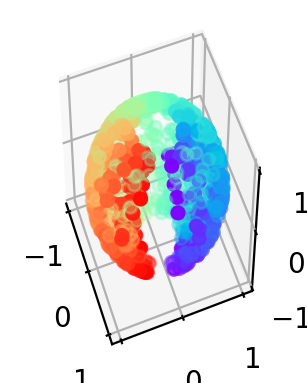

In [3]:
# Plot our dataset.
fig = plt.figure(figsize=(10, 5), dpi=200)

ax = fig.add_subplot(251, projection="3d")
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(50, -20)
plt.show()

In [4]:
sphere_data = np.array([x, y, z]).T
print(sphere_data.shape)

(720, 3)


In [5]:
def viz_2d(x, col, title=None):
  plt.figure(figsize=(5, 5))
  plt.title(title)
  plt.scatter(x[:,0], x[:,1], c=col, cmap=plt.cm.rainbow)
  plt.show()

**PCA**

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_X = pca.fit_transform(sphere_data)
print(pca_X.shape)

(720, 2)


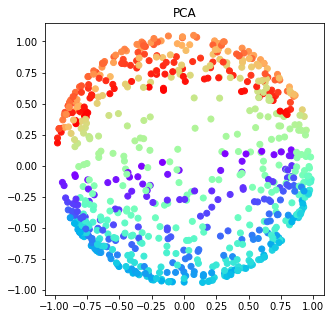

In [7]:
viz_2d(pca_X, colors, title='PCA')

**MDS**

In [8]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)
mds_X = mds.fit_transform(sphere_data)
print(mds_X.shape)

(720, 2)


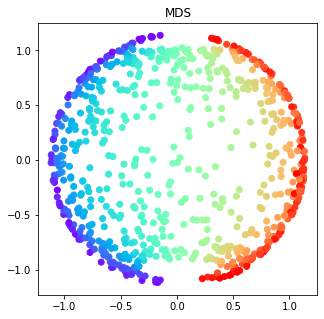

In [9]:
viz_2d(mds_X, colors, title='MDS')

**ISOMAP**

In [10]:
from sklearn.manifold import Isomap
im = Isomap(n_components=2)
im_X = im.fit_transform(sphere_data)
print(im_X.shape)

(720, 2)


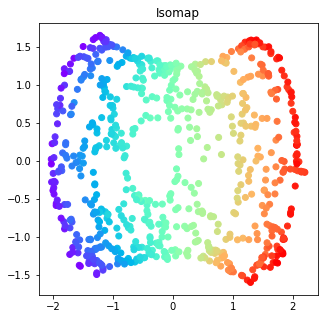

In [11]:
viz_2d(im_X, colors, title='Isomap')

**LLE**

In [12]:
from sklearn.manifold import LocallyLinearEmbedding as LLE
lle = LLE(n_components=2)
lle_X = lle.fit_transform(sphere_data)
print(lle_X.shape)

(720, 2)


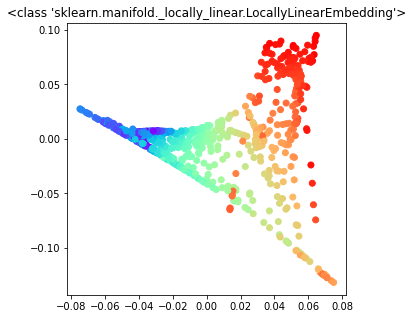

In [13]:
viz_2d(lle_X, colors, title=LLE)

**T-SNE**

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_X = tsne.fit_transform(sphere_data)
print(tsne_X.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(720, 2)


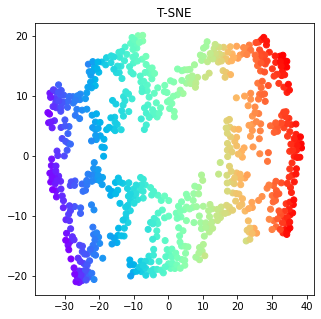

In [15]:
viz_2d(tsne_X, colors, title='T-SNE')